# Statsmodels

statsmodels.org

>`statmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.

## Import the relevant packages

In [20]:
# conda install statsmodels
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Let's take a look using the IRIS dataset

In [ ]:
iris = pd.read_csv('./data/IRIS.csv')
iris.head()

In [ ]:
type(iris)

In [ ]:
iris.plot.scatter(x = "sepal_length", y = "sepal_width")

## One-way ANOVA

In [35]:
species_anova = smf.ols('sepal_width ~ species', data=iris).fit()

aov_table = sm.stats.anova_lm(species_anova, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,584.1362,1.0,5040.682207,1.177556e-115
species,10.9776,2.0,47.364461,1.327917e-16
Residual,17.0350,147.0,NaN,NaN


<AxesSubplot:xlabel='species'>

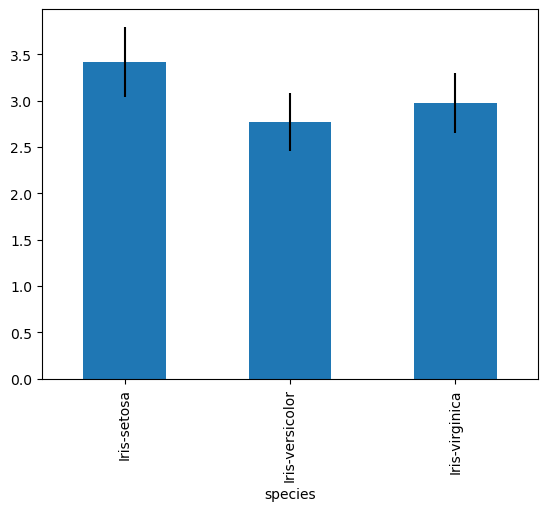

In [41]:
sd = iris.groupby('species')['sepal_width'].std()
iris.groupby('species')['sepal_width'].mean().plot.bar(yerr = sd)

In [37]:
mult_comp = sm.stats.multicomp.pairwise_tukeyhsd(iris['sepal_width'],
                                                 iris['species'],
                                                 alpha=0.05)
mult_comp.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


## Simple linear regression

In [ ]:
X = iris["sepal_length"]
X = sm.add_constant(X) # adding a constant

Y = iris["sepal_width"]

In [ ]:
type(Y)

In [ ]:
X

In [ ]:
model = sm.OLS(endog= Y, exog= X).fit()
model

In [ ]:

model.summary()

In [ ]:
predictions = model.predict(X) 
predictions

### Visualizing the model

In [ ]:
iris["predicted_sepal_width"] = predictions
iris.head()

In [ ]:
ax = iris.plot.scatter(x = "sepal_length", y = "sepal_width", label = "Orig. values")
iris.plot.scatter(x = "sepal_length", y = "predicted_sepal_width", c='r', ax = ax, label = "Predicted")

In [ ]:
type(ax)

### Same model, defined using a R-like formulas

In [ ]:
f = 'sepal_width ~ 1 + sepal_length + petal_width'
m = smf.ols(formula = f, data = iris).fit()

m.summary()

## Linear mixed effects models

In [ ]:
iris["species"].unique()

In [ ]:
for spcs in iris["species"].unique():
    idx = iris["species"]==spcs
    (iris[idx].plot.scatter(x = "sepal_length", y = "sepal_width", title = spcs))

In [ ]:
f_mlm = 'sepal_width ~ 1 + sepal_length'
m_mlm = smf.mixedlm(formula=f_mlm, data=iris, groups = iris["species"]).fit()
m_mlm.summary()

## Sci-kit learn

An alternate (and potentially more advanced) alternative is **sci-kit learn**.
Sci-kit is the leading package for (mostly) supervised machine-learning. This type of machine learning relies often on variants of regression analysis. Therefore, sci-kit has multiple advanced types of regression built-in.